# data collection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file, skipping lines with too many fields
df = pd.read_csv("books.csv", on_bad_lines='skip')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [2]:
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


# data preprocessing

1.data cleaning

In [3]:
# Handle missing values
df.dropna(inplace=True)

# Drop rows with NaT values (if needed)
df.dropna(subset=['publication_date'], inplace=True)

In [4]:
# Data Transformation: Log transformation of 'ratings_count'
df['ratings_count_log'] = np.log(df['ratings_count'] + 1)

In [5]:
df.ratings_count_log

0        14.555394
1        14.582451
2         8.753687
3        14.665485
4        10.631736
           ...    
11118     5.056246
11119     6.664409
11120     6.710523
11121     6.646391
11122     4.736198
Name: ratings_count_log, Length: 11123, dtype: float64

In [6]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'ratings_count_log'],
      dtype='object')

In [7]:
# Remove extra spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

In [8]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'ratings_count_log'],
      dtype='object')

C:\Users\prati\AppData\Local\Temp\ipykernel_23896\2503478439.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('ratings_count_bins_equal_freq')['ratings_count'].mean()


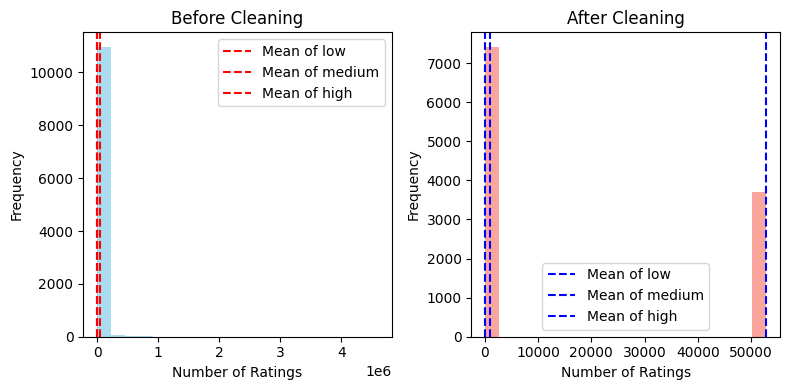

In [9]:
# Equal Frequency Binning
num_bins_equal_freq = 3  # Number of bins for equal frequency binning
df['ratings_count_bins_equal_freq'] = pd.qcut(df['ratings_count'], q=num_bins_equal_freq, labels=['low', 'medium', 'high'])

# Calculate mean for each bin
bin_means = df.groupby('ratings_count_bins_equal_freq')['ratings_count'].mean()

# Replace noisy data with mean value of the bin
df['ratings_count_cleaned'] = df.apply(lambda row: bin_means[row['ratings_count_bins_equal_freq']], axis=1)

# Visualization before and after cleaning
plt.figure(figsize=(8, 4))

# Plot before cleaning
plt.subplot(1, 2, 1)
plt.hist(df['ratings_count'], color='skyblue', bins=20, alpha=0.7)
for bin_label, bin_mean in bin_means.items():
    plt.axvline(x=bin_mean, color='red', linestyle='--', label=f'Mean of {bin_label}')
plt.title('Before Cleaning')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)  # Remove grid lines

# Plot after cleaning
plt.subplot(1, 2, 2)
plt.hist(df['ratings_count_cleaned'], color='salmon', bins=20, alpha=0.7)
for bin_label, bin_mean in bin_means.items():
    plt.axvline(x=bin_mean, color='blue', linestyle='--', label=f'Mean of {bin_label}')
plt.title('After Cleaning')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)  # Remove grid lines

plt.tight_layout()
plt.show()

In [10]:
df.ratings_count.describe()

count    1.112300e+04
mean     1.794285e+04
std      1.124992e+05
min      0.000000e+00
25%      1.040000e+02
50%      7.450000e+02
75%      5.000500e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

# feature engineering

In [11]:

# Reformatting: Convert 'publication_date' to datetime
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['publication_date'].min()
df['publication_date'].max()

# smoothing
df['ratings_count_smoothed'] = df['ratings_count'].rolling(window=3).mean()

# Feature Interaction: Create a new feature by multiplying 'ratings_count' and 'text_reviews_count'
df['ratings_text_interaction'] = df['ratings_count'] * df['text_reviews_count']

# Date Feature Extraction: Extract year from 'publication_date' column
df['publication_year'] = df['publication_date'].dt.year

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   bookID                         11123 non-null  int64         
 1   title                          11123 non-null  object        
 2   authors                        11123 non-null  object        
 3   average_rating                 11123 non-null  float64       
 4   isbn                           11123 non-null  object        
 5   isbn13                         11123 non-null  int64         
 6   language_code                  11123 non-null  object        
 7   num_pages                      11123 non-null  int64         
 8   ratings_count                  11123 non-null  int64         
 9   text_reviews_count             11123 non-null  int64         
 10  publication_date               11121 non-null  datetime64[ns]
 11  publisher      

# EDA

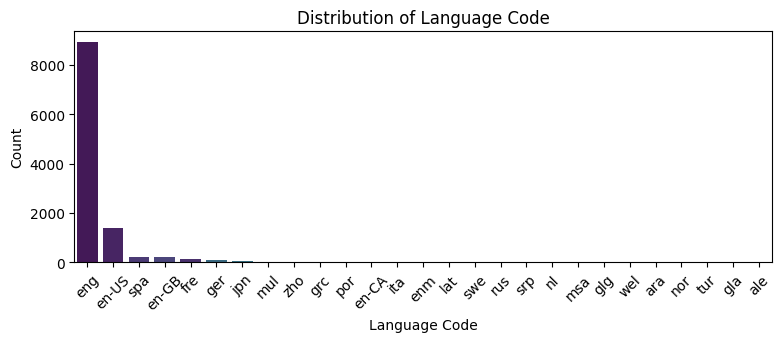

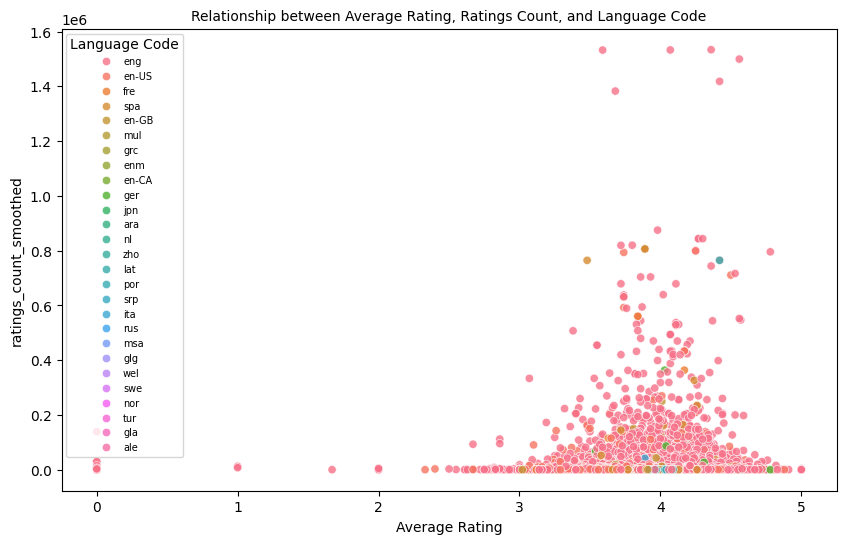

C:\Users\prati\AppData\Local\Temp\ipykernel_23896\3094104411.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language_code', y='average_rating', data=df, palette='Set2')


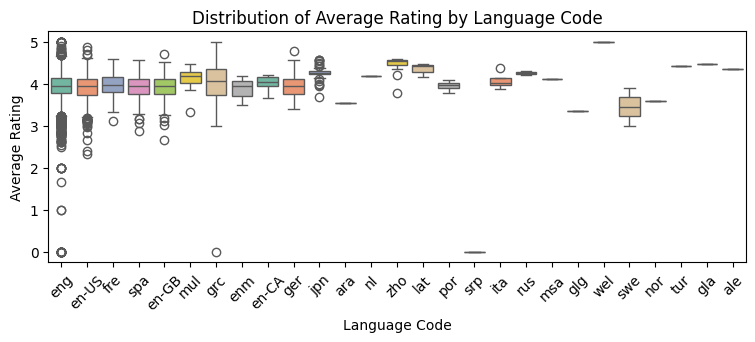

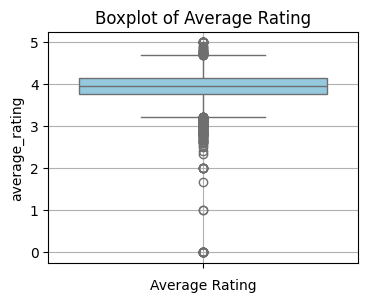

In [12]:
#  distribution of 'language_code'
plt.figure(figsize=(9, 3))
sns.countplot(x='language_code', hue='language_code', data=df, order=df['language_code'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Language Code')
plt.xlabel('Language Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#relationship between average rating and rating count smoothed based on language code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rating', y='ratings_count_smoothed', hue='language_code', data=df, alpha=0.8)
plt.title('Relationship between Average Rating, Ratings Count, and Language Code', fontsize=10)
plt.xlabel('Average Rating')
plt.ylabel('ratings_count_smoothed')
plt.legend(title='Language Code', loc='upper left', fontsize=7)
plt.show()

# Comparing the distribution of 'average_rating' across different 'language_code' categories
plt.figure(figsize=(9, 3))
sns.boxplot(x='language_code', y='average_rating', data=df, palette='Set2')
plt.title('Distribution of Average Rating by Language Code')
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# outliers in 'average_rating' using a boxplot
plt.figure(figsize=(4, 3))
sns.boxplot(data=df['average_rating'], color='skyblue')
plt.title('Boxplot of Average Rating')
plt.xlabel('Average Rating')
plt.grid(True)
plt.show()

C:\Users\prati\AppData\Local\Temp\ipykernel_23896\903120929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = book.index, y = book,


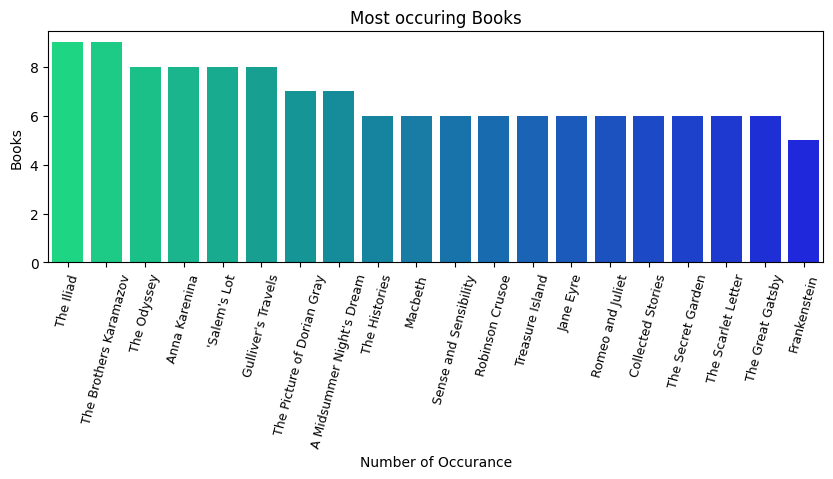

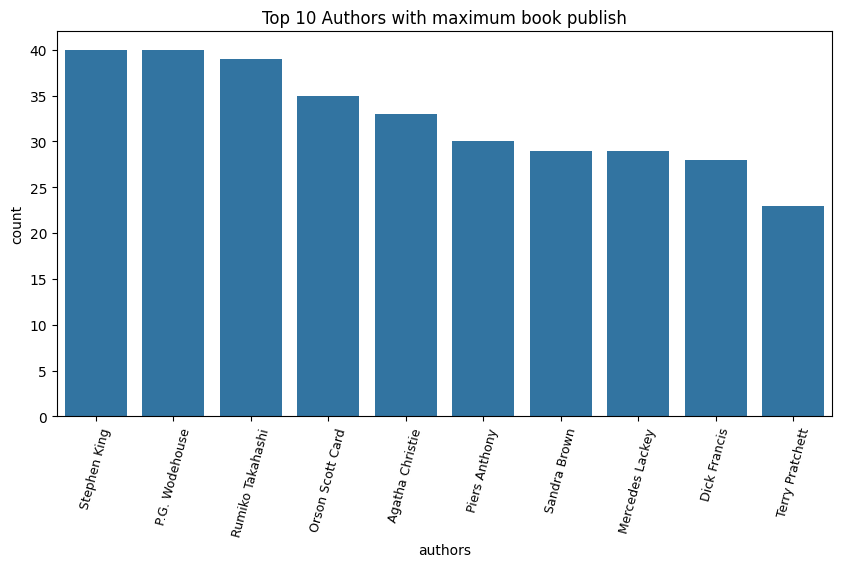

In [13]:
# to find most occuring book in our data
plt.figure(figsize = (10, 3))
book = df['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 9)
plt.show()

#top 10 books with maximum published
plt.figure(figsize = (10, 5))
sns.countplot(x = 'authors', data = df,
             order = df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(rotation =75 ,fontsize = 9)
plt.show()

In [14]:
# Calculate the IQR (Interquartile Range) for 'average_rating'
Q1 = df['average_rating'].quantile(0.25)
Q3 = df['average_rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the upper and lower bounds
df_no_outliers = df[(df['average_rating'] >= lower_bound) & (df['average_rating'] <= upper_bound)]

# Display the number of outliers removed
num_outliers_removed = len(df) - len(df_no_outliers)
print(f"Number of outliers removed: {num_outliers_removed}")

# Now, you can continue with your analysis using the df_no_outliers dataframe


Number of outliers removed: 237


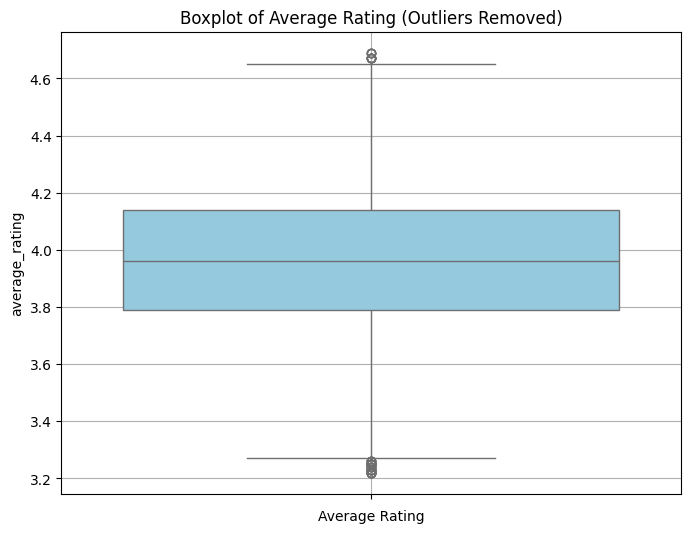

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers['average_rating'], color='skyblue')
plt.title('Boxplot of Average Rating (Outliers Removed)')
plt.xlabel('Average Rating')
plt.grid(True)
plt.show()

In [16]:
# Group by 'language_code' and compute mean 'average_rating' for each language
average_rating_by_language = df.groupby('language_code')['average_rating'].mean()
print("Average Rating by Language:")
print(average_rating_by_language)

# Filter groups where mean 'average_rating' is above a certain threshold
high_rated_languages = average_rating_by_language[average_rating_by_language > 4.0]
print("\nLanguages with Mean Average Rating above 4.0:")
print(high_rated_languages)

# Group by 'publisher' and compute count of books published by each publisher
books_per_publisher = df.groupby('publisher').size().sort_values(ascending=False)
print("\nNumber of Books Published by Each Publisher:")
print(books_per_publisher.head(10))  # Display top 10 publishers by number of books

# Group by 'publisher' and compute summary statistics for 'ratings_count'
ratings_stats_per_publisher = df.groupby('publisher')['ratings_count'].describe()
print("\nSummary Statistics for Ratings Count by Publisher:")
print(ratings_stats_per_publisher.head(10))  # Display summary statistics for top 10 publishers

# Transform 'ratings_count' by subtracting the mean of each publisher's ratings count
df['ratings_count_mean_adjusted'] = df.groupby('publisher')['ratings_count'].transform(lambda x: x - x.mean())

# Display the first few rows of the dataframe with the adjusted ratings count
print("\nAdjusted Ratings Count by Publisher:")
print(df[['publisher', 'ratings_count', 'ratings_count_mean_adjusted']].head())


Average Rating by Language:
language_code
ale      4.360000
ara      3.550000
en-CA    4.025714
en-GB    3.923411
en-US    3.914659
eng      3.934062
enm      3.873333
fre      3.971528
ger      3.950101
gla      4.470000
glg      3.360000
grc      3.707273
ita      4.078000
jpn      4.268696
lat      4.353333
msa      4.110000
mul      4.126316
nl       4.180000
nor      3.600000
por      3.945000
rus      4.255000
spa      3.929312
srp      0.000000
swe      3.455000
tur      4.420000
wel      5.000000
zho      4.456429
Name: average_rating, dtype: float64

Languages with Mean Average Rating above 4.0:
language_code
ale      4.360000
en-CA    4.025714
gla      4.470000
ita      4.078000
jpn      4.268696
lat      4.353333
msa      4.110000
mul      4.126316
nl       4.180000
rus      4.255000
tur      4.420000
wel      5.000000
zho      4.456429
Name: average_rating, dtype: float64

Number of Books Published by Each Publisher:
publisher
Vintage             318
Penguin Books       261

# Model Build

In [17]:
# Select relevant features
selected_features = ['bookID', 'title', 'authors', 'average_rating', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publisher']
df_selected = df[selected_features]

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Scale 0 to 1
scaler = MinMaxScaler()
numerical_cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
df_selected.loc[:, numerical_cols] = scaler.fit_transform(df_selected[numerical_cols])

# create cosine similarity matrix through find minimum distatnce between cols based on title
cosine_sim = cosine_similarity(df_selected[numerical_cols], df_selected[numerical_cols])


In [19]:
cosine_sim

array([[1.        , 0.99920536, 0.86205215, ..., 0.86165794, 0.86203603,
        0.8603109 ],
       [0.99920536, 1.        , 0.84878469, ..., 0.84895786, 0.84963587,
        0.84673811],
       [0.86205215, 0.84878469, 1.        , ..., 0.99981657, 0.99960679,
        0.99996589],
       ...,
       [0.86165794, 0.84895786, 0.99981657, ..., 1.        , 0.9999596 ,
        0.99964374],
       [0.86203603, 0.84963587, 0.99960679, ..., 0.9999596 , 1.        ,
        0.99936363],
       [0.8603109 , 0.84673811, 0.99996589, ..., 0.99964374, 0.99936363,
        1.        ]])

In [20]:
def recommend_books(book_title, cosine_sim=cosine_sim, df=df_selected, top_n=5):
    # find index and give it to index 0
    idx = df[df['title'] == book_title].index[0]
    
    # Sort the books based on similarity scores with other books 
    sim_scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)

    # Get the top N similar books (excluding the input book itself)
    top_similar_books = [(df.iloc[i]['title'], sim) for i, sim in sim_scores if i != idx][:top_n]

    return top_similar_books

In [21]:
# Test the recommendation function
recommended_books = recommend_books("Untouchable")
recommended_books

[('The Will to Change: Men  Masculinity  and Love', 0.9999999315748427),
 ("The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)",
  0.9999999049403139),
 ('The Gospel of the Flying Spaghetti Monster', 0.999999801915879),
 ('Miracle on the 17th Green (Travis McKinley  #1)', 0.9999997654312188),
 ("The Boy Who Couldn't Die", 0.9999996673353614)]

# Train and Evaluate Model

In [22]:
from sklearn.model_selection import train_test_split
# Train-Test Split
train_data, test_data = train_test_split(df_selected, test_size=0.2, random_state=42)

In [23]:
def evaluate_model(test_data, cosine_sim=cosine_sim, df=df_selected, top_n=5):
    # Get the indices of the test data books in the original DataFrame
    test_indices = test_data.index.values

    # Get the number of books in the dataset
    num_books = cosine_sim.shape[0]

    # Filter out-of-bounds indices
    test_indices = test_indices[test_indices < num_books]

    # Compute similarity scores only for the subset of test data
    sim_scores_all = cosine_sim[test_indices[:, None], :].reshape(len(test_indices), -1)

    # Get the indices of the top N similar books for each test book
    top_indices = np.argsort(-sim_scores_all, axis=1)[:, :top_n]

    # Get the titles and similarity scores of the top N similar books
    top_recommendations = [[(df.iloc[test_idx]['title'], sim_scores_all[i, test_idx]) for test_idx in indices] for i, indices in enumerate(top_indices)]

    return top_recommendations

# Evaluate the model on test data
test_recommendations = evaluate_model(test_data)


In [24]:
# Example: Print recommendations for a book in the test set
example_book_index = test_data.index[0]
example_book_title = test_data.loc[example_book_index, 'title']
print("Recommendations for '{}' based on Cosine Similarity:".format(example_book_title))
for book, similarity in test_recommendations[0]:
    print("- {} (Similarity Score: {:.2f})".format(book, similarity))

Recommendations for 'Strawberry Shortcake Murder (Hannah Swensen  #2)' based on Cosine Similarity:
- Strawberry Shortcake Murder (Hannah Swensen  #2) (Similarity Score: 1.00)
- Here  There Be Dragons (Chronicles of the Imaginarium Geographica  #1) (Similarity Score: 1.00)
- The Hungry Tide (Similarity Score: 1.00)
- Paradise (Similarity Score: 1.00)
- Nine Coaches Waiting (Similarity Score: 1.00)
